# Optimization method : Conjugate Gradient +Golden Search

1) Pass: Golden Search Method, employing the function "minimize_scalar" from scipy.optimize

2) Search direction : Conjugated Gradient, $\mathbf{d}_{(t)} = -\nabla_{\mathbf{x}} f_{(t)} + \beta_{(t)}\mathbf{d}_{(t-1)}$, onde $\beta_{(t)}=\left[\frac{||\nabla_{\mathbf{x}} f_{(t)}||}{||\nabla_{\mathbf{x}} f_{(t-1)}||}\right]^2$ 

The first step consists in defining the algorithms parameters, such as initial point $\mathbf{x}_{(0)}$, $\alpha_{(t)}$ and convergence tolerance constant $\epsilon_{\nabla}$, as well as the function to be minimized and its gradient evaluation:



In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
from plot_descent import plot_2d_contour, plot_3d_surface
%matplotlib widget
# Problem to be solved and variable for computational cost computation
global problem
cost=0
t=0
problem=2
# Initial guess
x=np.array([20, 20])
# Upper bound for the Gold Search algorithm
alpha0=1.0
# Convergence Tolerance
TolG=1e-5

# Definition of the equation to be minimized
def f_obj(x):
    global problem
    if problem==1:
        f = x[0]**2+x[1]**2
        df = np.array([2*x[0], 2*x[1]])
    elif problem==2:
        f=3*x[0]**2+2*x[0]*x[1]+2*x[1]**2+7
        df=np.array([6*x[0]+2*x[1], 2*x[0]+4*x[1]])
    return f, df
# Definition of the equation to be minimized as function of the step size alpha
def f_alpha(alpha,args):
    xk,d=args[0],args[1]
    xaux=xk+alpha*d
    f,df=f_obj(xaux)
    return f

# f and df values at the inital point
[f,df]=f_obj(x)
dftm1=df
print(df)

[160 120]


Now, we may start the iterative process for the function minimization using the gradient descent with step size calculated using the Golden Search method. For the latter, the function "minimize_scalar" from scipy.optimize is employed



In [2]:
points = [x]
values = [f]
while np.sqrt(df @ df)>TolG:
    # Search direction: Conjugated Gradient
    beta = (np.linalg.norm(df)/np.linalg.norm(dftm1))**2
 
    if t==0:
        d=-df
    else:
        d=-df+beta*dtm1
            
    # Step determination: Golden Search (method='golden'), Brent (method='brent') or Bounded (method='bounded')
    alpha=minimize_scalar(f_alpha, bounds=(.001, alpha0), args=([x,d]), method='bounded')

    # Update the current point 
    xt=x+alpha.x*d
    points.append(xt)
    
    # Saves information of gradient and descent direction of current iteration
    dftm1=df
    dtm1=d
    
    # Evaluate the objective funciton and gradient at the new point
    [f,df]=f_obj(xt)
    cost += 1
    values.append(f)
    
    # Update the design vairable and iteration number 
    x=xt
    t=t+1

The optimum design is stored in the variable $x$. Once the results are obtained, we may print them:

In [3]:
print('Optimum found:')
print(xt)
print('Objective function value at the optimum:')
print(f)
print('Norm of the gradient at the optimum:')
print(np.sqrt(df @ df))
print('Number of times that the f_obj function was evaluated:')
print(cost)
print('Number of iterations for convergence:')
print(t)


Optimum found:
[0. 0.]
Objective function value at the optimum:
7.0
Norm of the gradient at the optimum:
0.0
Number of times that the f_obj function was evaluated:
2
Number of iterations for convergence:
2


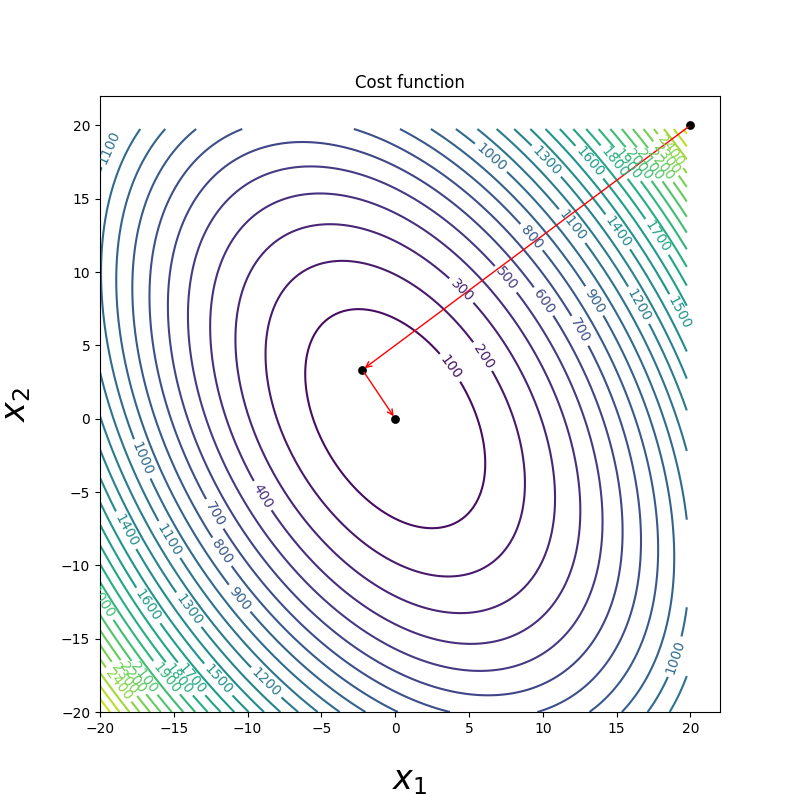

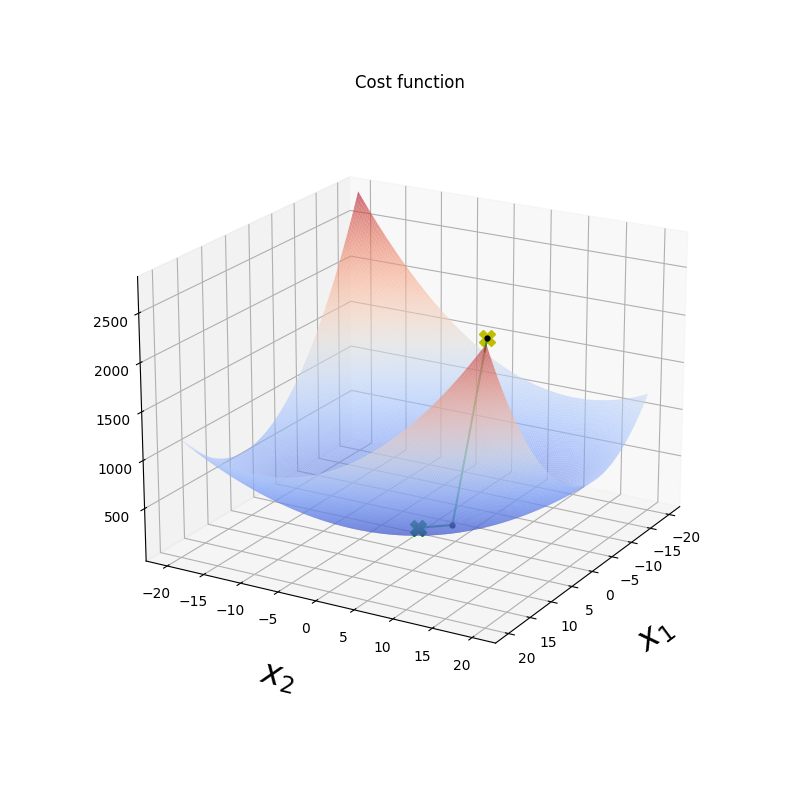

In [4]:
N = 10 # number of points to plot

plot_2d_contour(points[:N], f_obj)
plot_3d_surface(points[:N], values[:N], f_obj)